# Marketing Case Study

This data is from a retail food company, serving nearly one million cusomuers a year. They sell products from five major categories: wine, rare meat products, exotic fruits, specially prepared fish, and sweet products.

This company has three sales channels for consumers to acquire products: physical stores, catalogues, and the company's website. The company has solid revenues and a healthy bottom line in the last three years, but the profit growth perspectives for the next three years are not as promising. One strategic initiative is to improve the performance of marketing activities with a focus on marketing campaigns.

## Data Exploration

A key objective of data exploration is to provide a better understanding of the characteristic features of respondents.

A second key objective of data exploration is to provide and describe a customer segmentation based on customer behaviours.

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [191]:
# load data
with open("./data/marketing_data.csv", "r") as f:
    data = pd.read_csv(f)

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [193]:
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,1974,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,"$7,500.00",NaN,NaN,8/31/12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,12,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,NaN,0.444196,0.506250,NaN,49.109375,303.935714,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,NaN,0.538398,0.544538,NaN,28.962453,336.597393,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,49.000000,173.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,74.000000,504.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


### Check for duplicate rows

A person who's signed up may have lost access to their account for some reason and wish to sign up again. Here, we'll search for duplicate rows using the year_birth, marital status, education, and income columns.

In [194]:
# if we drop the id column and then check for duplicates
data.drop(columns=['ID'], inplace=True)

In [195]:
data.duplicated().value_counts()

False    2193
True       47
dtype: int64

In [196]:
data.drop_duplicates(inplace=True)
data.shape

(2193, 27)

### Data Cleanup

The income feature name has extra spaces and was classified as an object type.
Looking at the csv file also shows that the values contain an extra space at the end also.

In [197]:
# function to clean up income columns
def clean_income(df):
    df.rename(columns={" Income ":"Income"}, inplace=True)
    df['Income'] = df['Income'].str.replace("$","").str.replace(",","")
    df['Income'] = df['Income'].astype(float)
    return df

clean_income(data)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,...,11,4,0,0,0,0,0,0,0,US
2236,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,...,3,8,0,0,0,0,0,0,0,SP
2237,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,...,5,8,0,0,0,0,0,0,0,SP
2238,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,...,10,3,0,0,0,0,0,0,0,IND


In [198]:
#data.iloc[262,:]

In [199]:
# how many missing values
print("The number of null values is: ", data.Income.isnull().sum())
data['Income'] = data['Income'].fillna(data['Income'].median())
data['Income'].isna().sum()

The number of null values is:  24


0

In [200]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP


This dataset contains 27 features and the target of response, which indicates whether or not the customer accepted the offer in the last campaign.

### Exploration of Features

This dataset contains various characteristics features of the customers, including:

Categorical
- Education (ordinal)
- Marital status (nominal)
- Country (nominal)

Numerical
- Year of birth (discrete)
- Dependents: Kidhome, Teenhome (discrete)
- Income (continuous)
- Dt_Customer (discrete)
- Complaints

date the customer enrolled with the company's loyalty program 

#### Graphing the categorical features

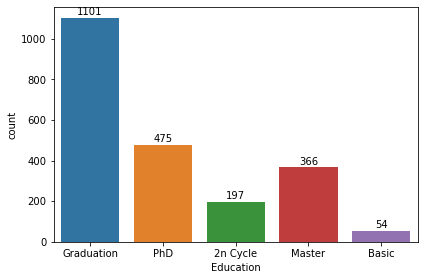

In [201]:
# Graph categorical features
fig, ax = plt.subplots(figsize = (6, 4))
sns.countplot(x = "Education", data=data)
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', label_type='edge', padding=1)
plt.tight_layout()
plt.show()

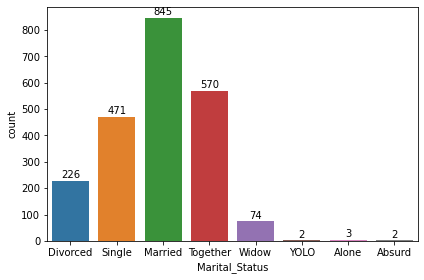

In [202]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.countplot(x = "Marital_Status", data=data)
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', label_type='edge', padding=1)
plt.tight_layout()
plt.show()

There are some categories that could be grouped together in the marital status category.

In [203]:
def group_mstatus(df):
    '''Function to reduce the number of categories in marital status options.'''
    solo_status = ['YOLO', 'Alone', 'Absurd']
    df['Marital_Status'] = df['Marital_Status'].replace(solo_status, 'Single')
    together = ['Married', 'Together']
    df['Marital_Status'] = df['Marital_Status'].replace(together, 'Couple')
    return df

group_mstatus(data)
print(data.Marital_Status.unique())

['Divorced' 'Single' 'Couple' 'Widow']


In [204]:
# group by education and marital status
df_plot = data.groupby(['Marital_Status', 'Education']).size().unstack()
ed_cols = ['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']
df_plot = df_plot[ed_cols]
df_plot

Education,Basic,Graduation,Master,2n Cycle,PhD
Marital_Status,,,,,
Couple,34,704,242,132,303
Divorced,1,116,37,23,49
Single,18,248,75,37,100
Widow,1,33,12,5,23


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple'),
  Text(1, 0, 'Divorced'),
  Text(2, 0, 'Single'),
  Text(3, 0, 'Widow')])

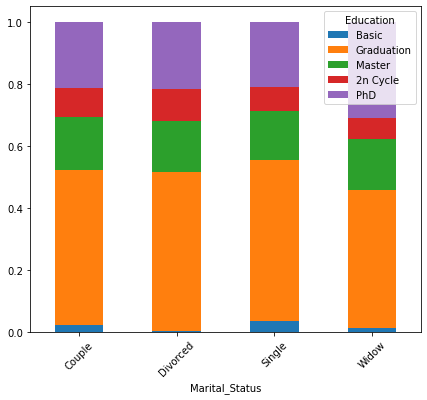

In [205]:
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind = 'bar', stacked=True, figsize=(7,6))
plt.xticks(rotation = 45)

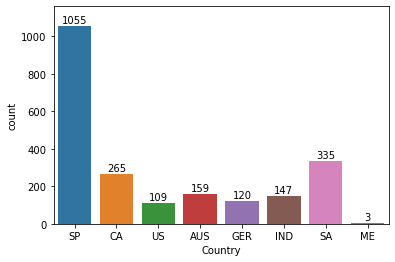

In [206]:
# plot country
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x = 'Country', data=data)
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', label_type='edge', padding=1)
ax.margins(y=0.1)
plt.show()

Most customers are from the country Spain.

#### Distribution of Continuous variables

In [207]:
data_num = data.select_dtypes(include=np.number)

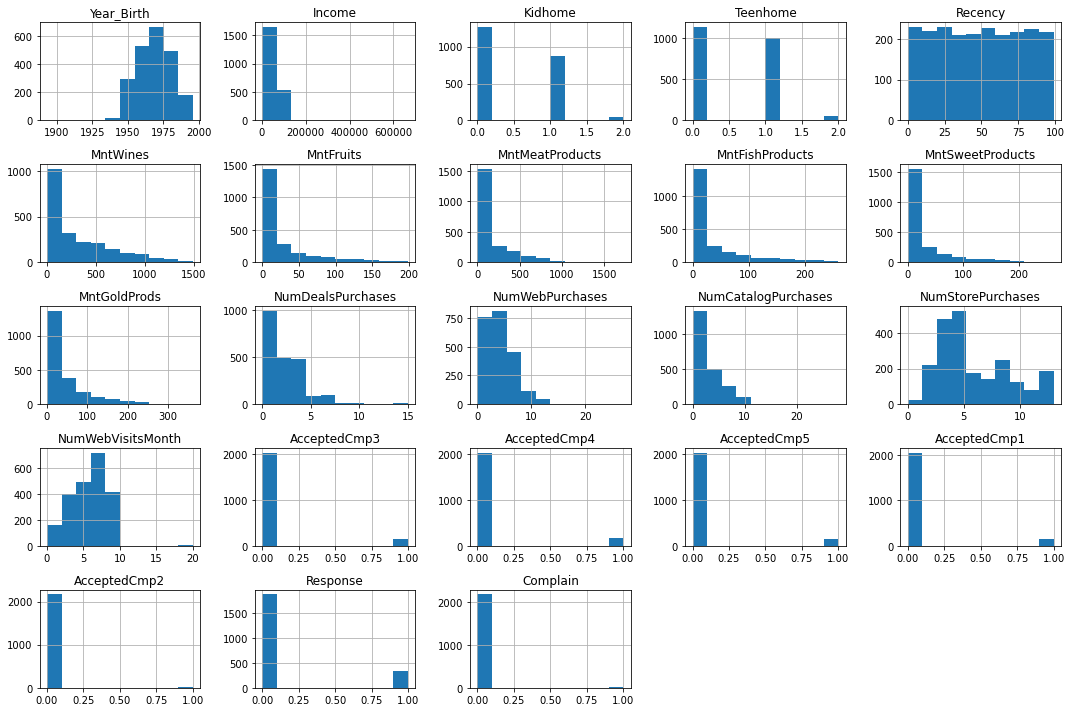

In [208]:
data_num.hist(figsize = (15, 10))
plt.tight_layout()
plt.show()

In [209]:
data_num.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,...,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,1968.779754,52275.255814,0.444140,0.506612,49.125855,304.152303,26.211126,167.314181,37.437301,27.037848,...,2.660283,5.784770,5.319197,0.072503,0.075239,0.073415,0.064751,0.013224,0.149567,0.009576
std,11.995943,25103.175746,0.538401,0.545450,29.001237,336.584764,39.618627,226.628559,54.628505,41.246123,...,2.923282,3.250099,2.424269,0.259379,0.263837,0.260877,0.246143,0.114258,0.356728,0.097409
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35682.000000,0.000000,0.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51411.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68274.000000,1.000000,1.000000,74.000000,505.000000,33.000000,230.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The year of birth and income appear to have some outliers.

Let's have a closer look at these two features.

### Income

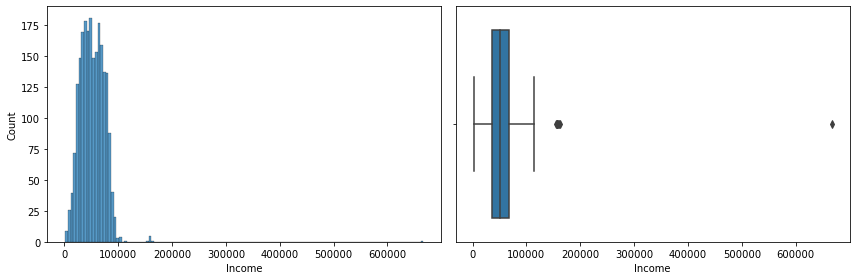

In [210]:
# plot income
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(x = "Income", data=data, ax=ax[0])
sns.boxplot(x="Income", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

The average income is €52275 while the median is €51411. As indicated by the boxplot, there are few outliers outside of the maximum.

In [272]:
# Use the inter-quartile region to find and evaluate outliers
# show how many points lie outside of the max (Q3 + IQR*1.5)
def get_upper_max(i: str):
    Q3 = np.percentile(data[i], 75) #68274
    Q1 = np.percentile(data[i], 25) #35682
    cut_off = (Q3 - Q1) * 1.5
    return Q3 + cut_off

upper = get_upper_max('Income')

print(f'The upper cut-off is {upper}')
data[data['Income'] > upper]

The upper cut-off is 117035.25


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Complain,Country,Age,Length_customer_yrs,Dependents,Total_Spent,Tot_Num_Purchases,Spent per purchase,Total_Accepted_Camp
325,1977,Graduation,Couple,157146.0,0,0,13,0.06,0.00,99.71,...,0,0,SA,45,9.21,0,1730,28.0,61.79,0
497,1982,PhD,Couple,160803.0,0,0,21,3.20,0.93,94.47,...,0,0,US,40,9.94,0,1717,29.0,59.21,0
731,1976,PhD,Couple,162397.0,1,1,31,79.44,0.93,14.95,...,0,0,SP,46,9.11,2,107,1.0,107.00,0
853,1971,Master,Couple,157733.0,1,0,37,66.10,1.69,15.25,...,0,0,SP,51,9.11,1,59,2.0,29.50,0
1826,1975,Graduation,Divorced,153924.0,0,0,81,16.67,16.67,16.67,...,0,0,SP,47,8.43,0,6,4.0,1.50,0
1925,1949,PhD,Couple,156924.0,0,0,85,25.00,12.50,25.00,...,0,0,CA,73,8.87,0,8,4.0,2.00,0
2204,1973,PhD,Couple,157243.0,0,1,98,1.24,0.12,98.38,...,0,0,IND,49,8.37,1,1608,22.0,73.09,0


In [271]:
# evaluate an extreme
Q3 = np.percentile(data['Income'], 75)
Q1 = np.percentile(data['Income'], 25)

box_extreme = ((Q3 - Q1) * 3) + Q3
print(f'The cutoff for an extreme value of income is {box_extreme}')

The cutoff for an extreme value of income is 165859.5


Of the outliers, most are still reasonable values for income. The highest income value of €666666 is an extreme outlier and will be dropped.

In [213]:
data.drop(index=527, inplace=True)

### Age

More meaning can be found in the age of a customer rather than the year of birth, so age will be used.

In [214]:
# calculate age of customer
data['Age'] = 2022 - data['Year_Birth']
data.drop(columns=['Year_Birth'], inplace=True)

In [215]:
data['Age'].describe()

count    2192.000000
mean       53.223996
std        11.997395
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

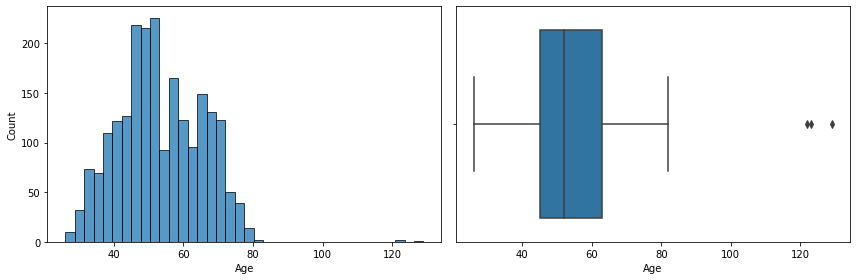

In [216]:
# plot Age
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(x = "Age", data=data, ax=ax[0])
sns.boxplot(x="Age", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

It seems unlikely that customers with an age of ~ 100+ years old would be alive and buying their own groceries.

The boxplot show us that there are a few outliers.

In [273]:
box_max = get_upper_max('Age')
print("The max value is:", box_max)
data[data['Age'] >= box_max]

The max value is: 90.0


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Complain,Country,Age,Length_customer_yrs,Dependents,Total_Spent,Tot_Num_Purchases,Spent per purchase,Total_Accepted_Camp
513,1893,2n Cycle,Single,60182.0,0,1,23,36.36,0.00,22.73,...,0,0,SA,129,8.16,1,22,3.0,7.33,0
827,1899,PhD,Couple,83532.0,0,0,36,40.74,7.77,30.33,...,0,0,SP,123,8.79,0,1853,14.0,132.36,1
2233,1900,2n Cycle,Divorced,36640.0,1,0,99,23.08,9.23,12.31,...,0,1,IND,122,8.79,1,65,5.0,13.00,0


The 3 age outliers are over 90 years old. They will be kept.

### Length of Customer's Enrollment with Company

In [218]:
# change Dt_Customer column to a datetime column
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format= '%m/%d/%y')

In [219]:
# data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format= '%m/%d/%y')
today = pd.to_datetime("today").strftime('%m-%d-%Y')

def customer_loyalty(df):
    ''' Calculate how long a customer has been part of a loyalty program (in years)'''
    # df['Length_customer'] = pd.to_datetime(dt.date.today()) - df['Dt_Customer']
    df['Length_customer'] = pd.to_datetime(today) - df['Dt_Customer']
    df['Length_customer'] = [float(str(df['Length_customer'][x])[:4]) for x in df.index]
    df['Length_customer'] = round(df['Length_customer']/365,2)
    df.rename(columns = {'Length_customer':'Length_customer_yrs'}, inplace = True)
    df.drop(columns='Dt_Customer', inplace = True)
    return df

customer_loyalty(data)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Length_customer_yrs
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,0,0,0,0,0,1,0,SP,52,8.07
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,0,0,0,0,1,1,0,CA,61,8.08
2,1958,Graduation,Couple,67267.0,0,1,0,134,11,59,...,0,0,0,0,0,0,0,US,64,8.17
3,1967,Graduation,Couple,32474.0,1,1,0,10,0,1,...,0,0,0,0,0,0,0,AUS,55,8.17
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,1,0,0,0,0,1,0,SP,33,8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,99,372,18,126,...,0,0,0,0,0,0,0,US,46,9.35
2236,1977,2n Cycle,Couple,31056.0,1,0,99,5,10,13,...,0,0,0,0,0,0,0,SP,45,9.47
2237,1976,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,0,0,0,0,0,0,0,SP,46,9.61
2238,1978,Graduation,Couple,65819.0,0,0,99,267,38,701,...,0,0,0,0,0,0,0,IND,44,9.62


### Number of Dependents

In [220]:
# create dependents feature for kid and teen at home
data['Dependents'] = data['Kidhome'] + data['Teenhome']

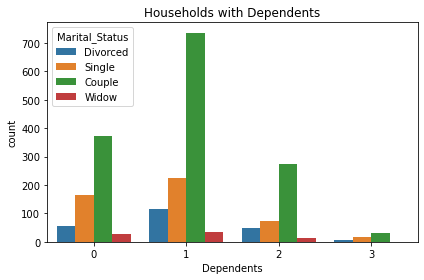

In [221]:
fig, ax = plt.subplots()
sns.countplot(x = 'Dependents', data=data, hue='Marital_Status')
plt.title("Households with Dependents")
plt.tight_layout()
plt.show()

### Total Monetary Value

How much has each customer spent?

In [222]:
data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] \
    + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [223]:
# calculate how much of the total amount was spent on each sub-category
for cat in data.filter(regex='Mnt', axis = 1).columns:
    if (cat != "Total_Spent"):
        data[cat] = round(data[cat] / data["Total_Spent"] * 100, 2)

In [224]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Length_customer_yrs,Dependents,Total_Spent
0,1970,Graduation,Divorced,84835.0,0,0,0,15.88,8.74,31.85,...,0,0,0,1,0,SP,52,8.07,0,1190
1,1961,Graduation,Single,57091.0,0,0,0,80.42,0.87,11.09,...,0,0,1,1,0,CA,61,8.08,0,577
2,1958,Graduation,Couple,67267.0,0,1,0,53.39,4.38,23.51,...,0,0,0,0,0,US,64,8.17,1,251
3,1967,Graduation,Couple,32474.0,1,1,0,90.91,0.00,9.09,...,0,0,0,0,0,AUS,55,8.17,2,11
4,1989,Graduation,Single,21474.0,1,0,0,6.59,17.58,26.37,...,0,0,0,1,0,SP,33,8.26,1,91


Text(0.5, 0, 'Total Amount of Money Spent')

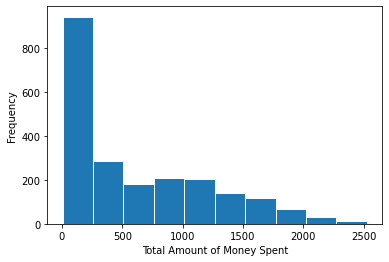

In [225]:
data['Total_Spent'].plot(kind='hist', bins=10, edgecolor='white')
plt.xlabel('Total Amount of Money Spent')

#### Amount of Money Spent on Different Types of Products

In [226]:
def get_mnt_cols(df):
    return list(df.filter(regex='Mnt', axis = 1).columns)

col_mnt = get_mnt_cols(data)

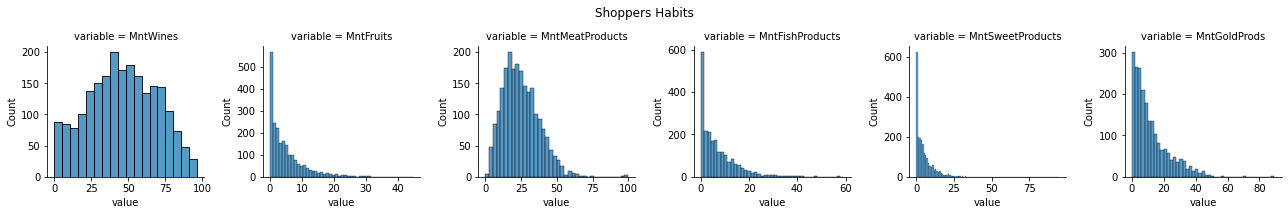

In [227]:
def graph_amount_spent():
    df_mnt = data[col_mnt]

# plot the mnt columns using seaborn's facetgrid
# inspired by DataCamp's Customer Segmentation Template
    graph = sns.FacetGrid(
    df_mnt.melt(), 
    col = 'variable', 
    sharey = False, 
    sharex = False, 
    col_wrap=3)
    graph.map(sns.histplot, "value")
    graph.fig.subplots_adjust(top=0.8)
    graph.fig.suptitle("Shoppers Habits")
    plt.show()

graph_amount_spent()

Wine is the biggest seller followed by meat products.

### Shoppers Frequency

How many times have customers made a purchase?

In [228]:
def get_purchases_cols(df):
    col_list = df.columns.to_list()
    return [col for col in col_list if 'Purchases' in col]

col_habits = get_purchases_cols(data)
col_habits.extend(['Recency', 'NumWebVisitsMonth'])
# print(col_habits)

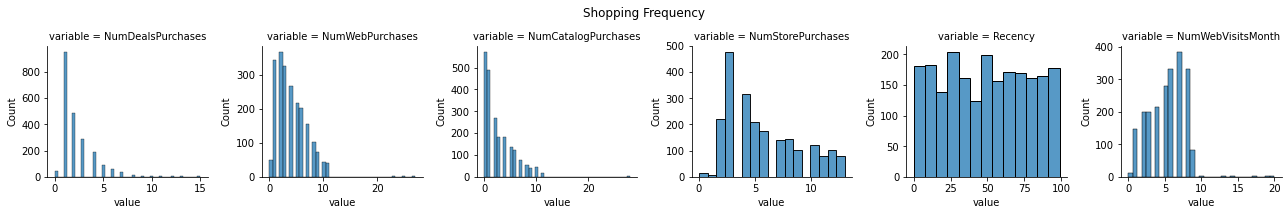

In [229]:
def graph_num_purchases():
    df_hab = data[col_habits]

# plot the mnt columns using seaborn's facetgrid
# inspired by DataCamp's Customer Segmentation Template
    graph = sns.FacetGrid(
    df_hab.melt(), 
    col = 'variable', 
    sharey = False, 
    sharex = False,
    col_wrap=3)
    graph.map(sns.histplot, "value")
    graph.fig.subplots_adjust(top=0.8)
    graph.fig.suptitle("Shopping Frequency")
    plt.show()

graph_num_purchases()

In [230]:
# Create a new column to indicate the total number of purchases made
data['Tot_Num_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

<AxesSubplot:xlabel='Tot_Num_Purchases', ylabel='Count'>

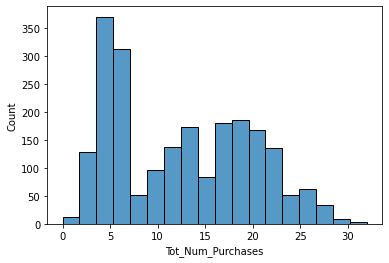

In [231]:
sns.histplot(x ="Tot_Num_Purchases", data=data)

In [232]:
len(data[data['Tot_Num_Purchases'] == 0])

6

<AxesSubplot:xlabel='Tot_Num_Purchases', ylabel='Total_Spent'>

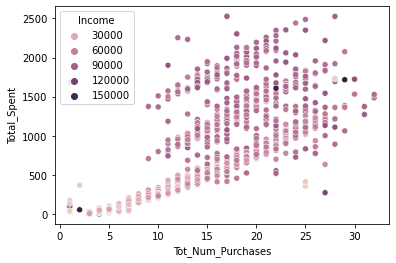

In [233]:
# What is the average number of purchases for customers
data['Tot_Num_Purchases'].replace(0, np.nan, inplace=True)
data['Tot_Num_Purchases'].fillna(data['Tot_Num_Purchases'].mode().iloc[0], inplace=True)
len(data[data['Tot_Num_Purchases'].isna()])

# plot total_spent vs tot number of purchases
# sns.scatterplot(x="Tot_Num_Purchases", y="Total_Spent", data=data, hue='Income')

#### Specific Questions related to the money spent by customers

Text(0, 0.5, 'Total Amount Spent ($)')

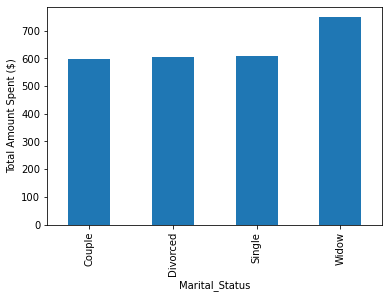

In [234]:
# plot the average amount of money spent by each customer depending on marital status
data.groupby('Marital_Status')['Total_Spent'].mean().plot(kind='bar',)
plt.ylabel('Total Amount Spent ($)')

Text(0, 0.5, 'Total Amount Spent by Customer')

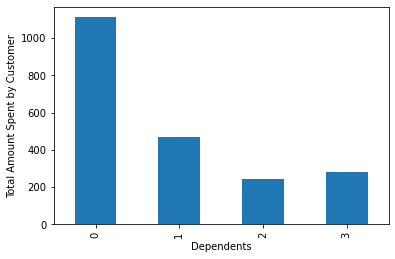

In [235]:
# Does the amount of money does a household spends depend on the number of dependents?
data_dep = data.groupby(['Dependents'])['Total_Spent'].mean()
data_dep.plot(kind = 'bar',)
plt.ylabel("Total Amount Spent by Customer")

Households with more than one dependent results in less money being spent at the store.

Text(0.5, 1.0, 'Total Amount Spent by Different Households,\n by number of dependents')

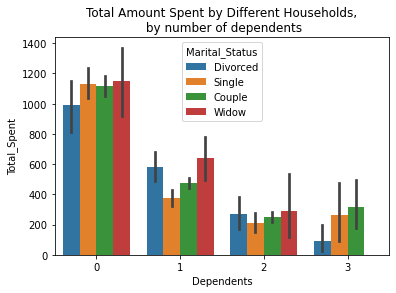

In [236]:
sns.barplot(x= 'Dependents', y = 'Total_Spent', data=data, hue='Marital_Status')
plt.title("Total Amount Spent by Different Households,\n by number of dependents")

#### How much money did each customer spend each time they made a purchase?

In [237]:
data["Spent per purchase"] = round(data["Total_Spent"] / data["Tot_Num_Purchases"], 2)
# data.head()

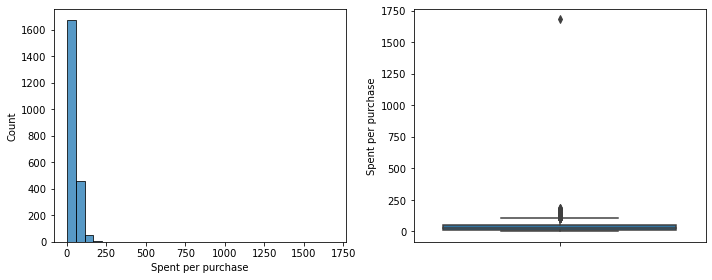

In [238]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.histplot(x="Spent per purchase", data=data, bins=30, ax=ax[0])
sns.boxplot(y="Spent per purchase", data=data, ax=ax[1])
plt.tight_layout()

In [239]:
data.loc[data['Spent per purchase'].idxmax()]

Year_Birth                 1978
Education              2n Cycle
Marital_Status           Couple
Income                  51411.0
Kidhome                       0
Teenhome                      0
Recency                      53
MntWines                   1.91
MntFruits                  0.12
MntMeatProducts           95.71
MntFishProducts            0.71
MntSweetProducts           0.24
MntGoldProds               1.31
NumDealsPurchases             0
NumWebPurchases               0
NumCatalogPurchases           0
NumStorePurchases             1
NumWebVisitsMonth             0
AcceptedCmp3                  0
AcceptedCmp4                  1
AcceptedCmp5                  0
AcceptedCmp1                  0
AcceptedCmp2                  0
Response                      0
Complain                      0
Country                     IND
Age                          44
Length_customer_yrs        9.92
Dependents                    0
Total_Spent                1679
Tot_Num_Purchases           1.0
Spent pe

In [240]:
# drop item that is outlier
data.drop(index=1213, inplace=True)

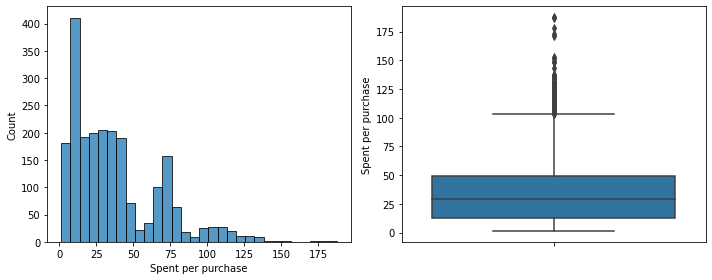

In [241]:
fig, ax = plt.subplots(1,2, figsize = (10, 4))
sns.histplot(x="Spent per purchase", data=data, bins=30, ax=ax[0])
sns.boxplot(y="Spent per purchase", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

#### If a customer complains, does that reflect in the amount of money a customer has spent in the store?

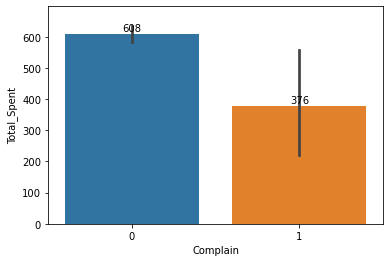

In [242]:
fig, ax = plt.subplots(figsize = (6,4))
sns.barplot(x="Complain", y="Total_Spent", data=data)
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', label_type='edge', padding=1)
ax.margins(y=0.1)
plt.show()

### Campaign Success

In [243]:
# total number of past accepted campaigns
data['Total_Accepted_Camp'] = np.sum(data.filter(regex="Cmp"), axis=1)

def get_cmp_cols(df):
    col_list = df.columns.to_list()
    return [col for col in col_list if 'Cmp' in col]

cmp_cols = get_cmp_cols(data)

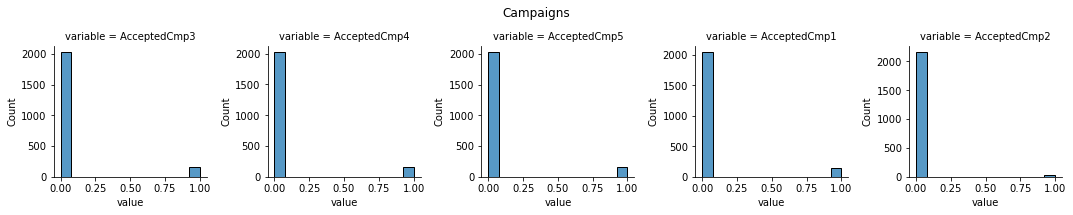

In [244]:
df_cmp = data[cmp_cols]

# plot the cmp columns using seaborn's facetgrid
# inspired by DataCamp's Customer Segmentation Template
graph = sns.FacetGrid(
    df_cmp.melt(), 
    col = 'variable', 
    sharey = False, 
    sharex = False)
graph.map(sns.histplot, "value")
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle("Campaigns")
plt.show()

<AxesSubplot:ylabel='Total_Accepted_Camp'>

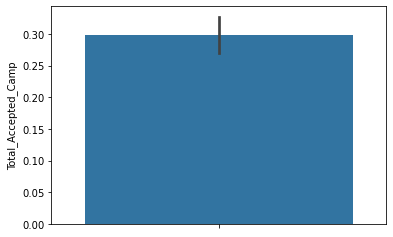

In [245]:
# percent of the total number of campaigns accepted by customers
sns.barplot(y='Total_Accepted_Camp', data=data)

About one-third of customers have responded to a past campaign.

### Distribution of Numeric Variables - Gaussian or not

The Shapiro test is one way of quantifying deviations from normality. Here, it will be used to assess whether numerical features have a Gaussian distribution (normal) or not.

In [253]:
from scipy.stats import shapiro

def shapiro_test(data_col):
    stat, p = shapiro(data_col)
    print('%s : Statistic =%.3f, p=%.5f' % (column, stat, p))
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (We fail to reject H0\n)')
    else:
        print('Sample does not look Gaussian (We reject H0)\n')

In [247]:
X = data.select_dtypes(include=np.number).columns.to_list()

column_dict= {elem : pd.DataFrame() for elem in X}
for column in X:
    column_dict[column] = data[column]
    shapiro_test(column_dict[column])

Year_Birth : Statistics=0.975, p=0.000
Sample does not look Gaussian (We reject H0)

Income : Statistics=0.976, p=0.000
Sample does not look Gaussian (We reject H0)

Kidhome : Statistics=0.677, p=0.000
Sample does not look Gaussian (We reject H0)

Teenhome : Statistics=0.695, p=0.000
Sample does not look Gaussian (We reject H0)

Recency : Statistics=0.954, p=0.000
Sample does not look Gaussian (We reject H0)

MntWines : Statistics=0.984, p=0.000
Sample does not look Gaussian (We reject H0)

MntFruits : Statistics=0.806, p=0.000
Sample does not look Gaussian (We reject H0)

MntMeatProducts : Statistics=0.962, p=0.000
Sample does not look Gaussian (We reject H0)

MntFishProducts : Statistics=0.813, p=0.000
Sample does not look Gaussian (We reject H0)

MntSweetProducts : Statistics=0.744, p=0.000
Sample does not look Gaussian (We reject H0)

MntGoldProds : Statistics=0.862, p=0.000
Sample does not look Gaussian (We reject H0)

NumDealsPurchases : Statistics=0.739, p=0.000
Sample does not 

The Shapiro test indicates that the null-hypothesis should be rejected for each feature (none come from a Gaussian distribution).

The variables related to the amount spent and the number of purchases are potentially log normal. Apply a log transform and re-check the to see whether these features have a log-normal distribution.

In [248]:
y = col_mnt
y.extend(col_habits)
y.remove('Recency')

In [249]:
data_log = pd.DataFrame()

for col in y:
    data_log[col] = np.log1p(data[col])

In [251]:
data_log.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,3.653772,1.381078,3.123302,1.637316,1.383733,2.204199,1.079637,1.480182,1.006686,1.800349,1.752106
std,0.754292,0.917144,0.548653,1.017910,0.940362,0.904334,0.469471,0.561564,0.770025,0.486743,0.462879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.401197,0.641854,2.807591,0.815365,0.620576,1.571736,0.693147,1.098612,0.000000,1.386294,1.386294
50%,3.844814,1.381282,3.192942,1.757858,1.458615,2.263844,1.098612,1.609438,1.098612,1.791759,1.945910
75%,4.174617,2.078190,3.524005,2.426570,2.085669,2.889260,1.386294,1.945910,1.609438,2.197225,2.079442
max,4.578107,3.818811,4.612245,4.095843,4.559964,4.504465,2.772589,3.332205,3.367296,2.639057,3.044522


In [260]:
# test if features are log normal
column_dict= {elem : pd.DataFrame() for elem in data_log.columns}
for column in data_log.columns:
    column_dict[column] = data[column]
    shapiro_test(column_dict[column])

MntWines : Statistic =0.984, p=0.00000
Sample does not look Gaussian (We reject H0)

MntFruits : Statistic =0.806, p=0.00000
Sample does not look Gaussian (We reject H0)

MntMeatProducts : Statistic =0.962, p=0.00000
Sample does not look Gaussian (We reject H0)

MntFishProducts : Statistic =0.813, p=0.00000
Sample does not look Gaussian (We reject H0)

MntSweetProducts : Statistic =0.744, p=0.00000
Sample does not look Gaussian (We reject H0)

MntGoldProds : Statistic =0.862, p=0.00000
Sample does not look Gaussian (We reject H0)

NumDealsPurchases : Statistic =0.739, p=0.00000
Sample does not look Gaussian (We reject H0)

NumWebPurchases : Statistic =0.898, p=0.00000
Sample does not look Gaussian (We reject H0)

NumCatalogPurchases : Statistic =0.814, p=0.00000
Sample does not look Gaussian (We reject H0)

NumStorePurchases : Statistic =0.905, p=0.00000
Sample does not look Gaussian (We reject H0)

NumWebVisitsMonth : Statistic =0.930, p=0.00000
Sample does not look Gaussian (We rejec

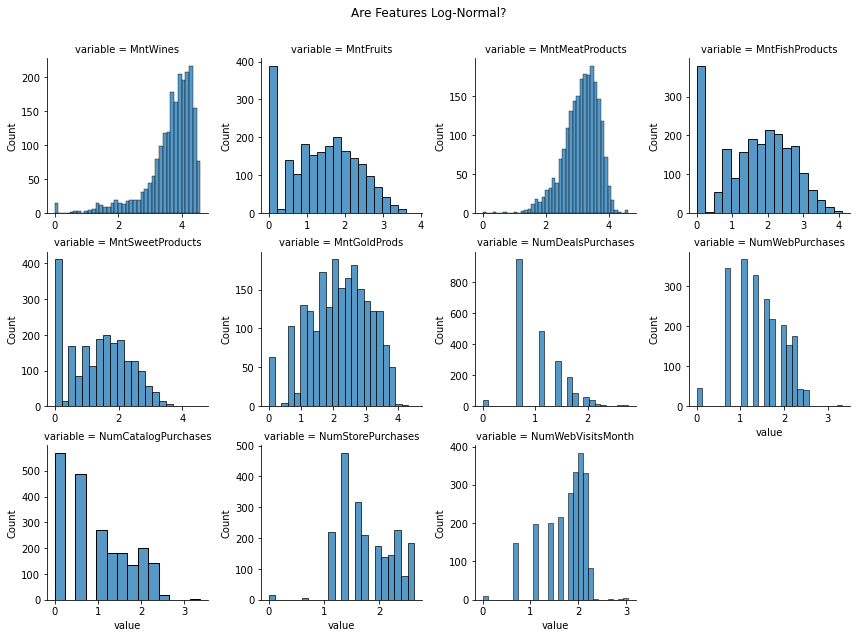

In [261]:
graph = sns.FacetGrid(
    data_log.melt(), 
    col = 'variable', 
    sharey = False, 
    sharex = False,
    col_wrap=4)
graph.map(sns.histplot, "value")
graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle("Are Features Log-Normal?")
plt.show()

After log transformation, the features were still not considered part of a Gaussian distribution.

### Correlation of Features

Plot a correlation matrix to assess whether any features are correlated with each other.

<AxesSubplot:>

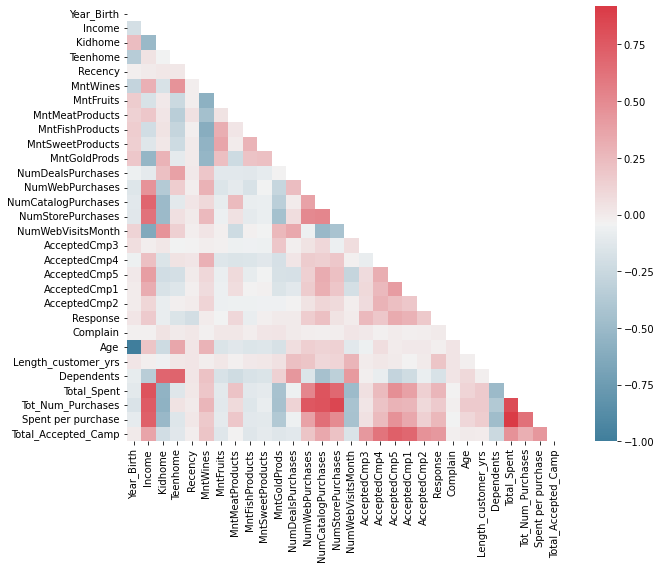

In [275]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), mask=mask, cmap= cmap, square= True)


In [291]:
df_corr = data.corr()
corr_mask = df_corr.mask(np.triu(np.ones_like(df_corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)
# corr_unstacked

In [294]:
pd.DataFrame(corr_unstacked[(abs(corr_unstacked)>0.7)&(abs(corr_unstacked)<1)]).sort_index()
# .style.background_gradient(cmap='coolwarm', low=-.6, high=.5)


0
AcceptedCmp5        Total_Accepted_Camp  0.717324
Income              Spent per purchase   0.722403
                    Tot_Num_Purchases    0.738169
                    Total_Spent          0.788053
NumCatalogPurchases Tot_Num_Purchases    0.784316
                    Total_Spent          0.778290
NumStorePurchases   Tot_Num_Purchases    0.853793
NumWebPurchases     Tot_Num_Purchases    0.764794
Total_Spent         Spent per purchase   0.917749
                    Tot_Num_Purchases    0.822079
Year_Birth          Age                 -1.000000

In [296]:
pd.DataFrame(corr_unstacked[corr_unstacked< -.5]).sort_index()

0
Income              Kidhome             -0.511898
                    MntGoldProds        -0.528055
                    NumWebVisitsMonth   -0.645045
Kidhome             NumCatalogPurchases -0.501602
                    NumStorePurchases   -0.502123
                    Spent per purchase  -0.516221
                    Tot_Num_Purchases   -0.572769
                    Total_Spent         -0.557261
MntWines            MntFishProducts     -0.603660
                    MntFruits           -0.574822
                    MntGoldProds        -0.530470
                    MntSweetProducts    -0.551328
NumCatalogPurchases NumWebVisitsMonth   -0.518036
Year_Birth          Age                 -1.000000

#### Correlation Results

Income is positively correlated with the features which indicate the amount spent in total, the amount spent per purchase, and the total number of purchases. These three engineered features are also correlated with each other.

Income is also negatively correlated with the amount of gold products.

Having a child at homeless is being spent at the store as well as the number of purchases.

## Save File

In [ ]:
data.to_csv("processed_data2.csv", index=False)